# 12 决策树

## 12.1 什么是决策树？
![](../image/dt1-1.png)

### 12.1.1 描述
* 非参数学习算法
* 可以解决分类问题
* 天然可以解决多分类问题
* 也可以解决回归问题
* 非常好的可解释性

### 12.1.2 问题
* 每个节点在哪个维度做划分？
* 某个维度在哪个值做划分？

划分后使得信息熵降低

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

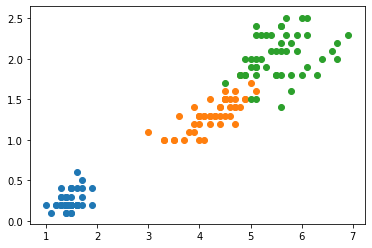

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
dt_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [5]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

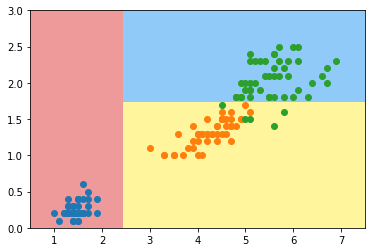

In [6]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

## 12.2 信息熵
### 12.2.1 概述
* 熵在信息论中代表随机变量不确定度的度量
    * 熵越大，数据的不确定性越高
    * 熵越小，数据的不确定性越低
    
$$H = -\sum_{i=1}^{k}p_ilog(p_i)$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

In [9]:
x = np.linspace(0.01, 0.99, 200)

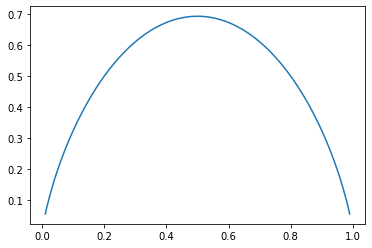

In [10]:
plt.plot(x, entropy(x))
plt.show()

## 12.3 使用信息熵寻找最优划分

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy", random_state=42)
dt_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [14]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

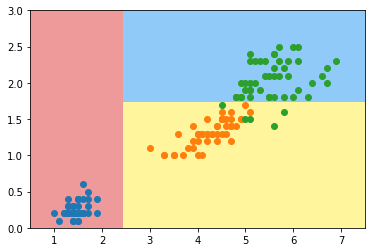

In [15]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

#### 模拟使用信息熵进行划分

In [16]:
def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [17]:
from collections import Counter
from math import log

def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X, y):
    
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                e = p_l * entropy(y_l) + p_r * entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
                
    return best_entropy, best_d, best_v

In [18]:
best_entropy, best_d, best_v = try_split(X, y)
print("best_entropy =", best_entropy)
print("best_d =", best_d)
print("best_v =", best_v)

best_entropy = 0.46209812037329684
best_d = 0
best_v = 2.45


In [19]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [20]:
entropy(y1_l)

0.0

In [21]:
entropy(y1_r)

0.6931471805599453

In [22]:
best_entropy2, best_d2, best_v2 = try_split(X1_r, y1_r)
print("best_entropy =", best_entropy2)
print("best_d =", best_d2)
print("best_v =", best_v2)

best_entropy = 0.2147644654371359
best_d = 1
best_v = 1.75


In [23]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [24]:
entropy(y2_l)

0.30849545083110386

In [25]:
entropy(y2_r)

0.10473243910508653

## 12.4 基尼系数
$$G = 1 - \sum_{i=1}^{k}p_i^2$$

![](../image/dt4-1.png)

$$ G= 1-x^2 - (1-x)^2\\  
\quad=1-x^2 - 1 + 2x -x^2\\
=-2x^2 + 2x\\
$$

In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, criterion="gini", random_state=42)
dt_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [29]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

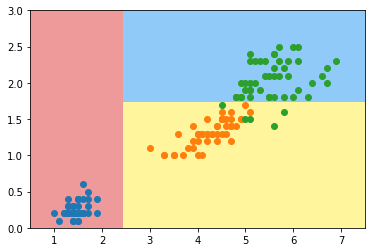

In [30]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

#### 模拟使用基尼系数划分

In [31]:
from collections import Counter
from math import log

def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p**2
    return res

def try_split(X, y):
    
    best_g = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
        for i in range(1, len(X)):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                v = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                X_l, X_r, y_l, y_r = split(X, y, d, v)
                p_l, p_r = len(X_l) / len(X), len(X_r) / len(X)
                g = p_l * gini(y_l) + p_r * gini(y_r)
                if g < best_g:
                    best_g, best_d, best_v = g, d, v
                
    return best_g, best_d, best_v

In [32]:
best_g, best_d, best_v = try_split(X, y)
print("best_g =", best_g)
print("best_d =", best_d)
print("best_v =", best_v)

best_g = 0.3333333333333333
best_d = 0
best_v = 2.45


In [33]:
X1_l, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)

In [34]:
gini(y1_l)

0.0

In [35]:
gini(y1_r)

0.5

In [36]:
best_g2, best_d2, best_v2 = try_split(X1_r, y1_r)
print("best_g =", best_g2)
print("best_d =", best_d2)
print("best_v =", best_v2)

best_g = 0.1103059581320451
best_d = 1
best_v = 1.75


In [37]:
X2_l, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)

In [38]:
gini(y2_l)

0.1680384087791495

In [39]:
gini(y2_r)

0.04253308128544431

#### 信息熵 vs 基尼系数
* 熵信息的计算比基尼系数稍慢(log比平方慢）
* scikit-learn中默认为基尼系数
* 大多数时候二者没有特别的效果优劣

## 12.5 CART与决策树中的超参数
### 12.5.1 概述
CART（Classification And Regression Tree）
* 根据某一个维度d和某一个阈值v进行二分
* scikit-learn的决策实现：CART
ID3，C4.5，C5.0

#### 复杂度
* 预测：O(logm)
* 训练：O(n*m*logm)
* 剪枝：降低复杂度，解决过拟合

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.25, random_state=666)

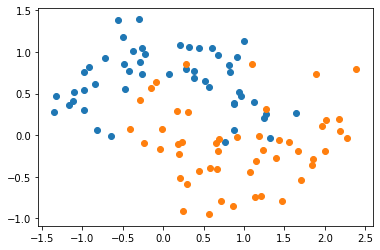

In [42]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [44]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

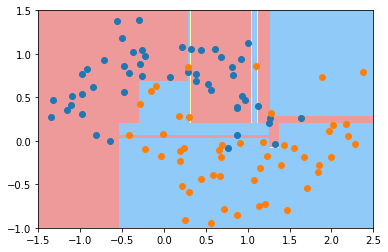

In [45]:
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

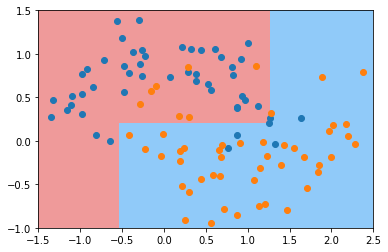

In [46]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)
dt_clf2.fit(X, y)

plot_decision_boundary(dt_clf2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

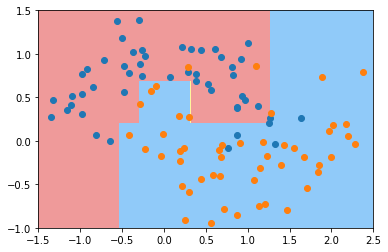

In [47]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)
dt_clf3.fit(X, y)

plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

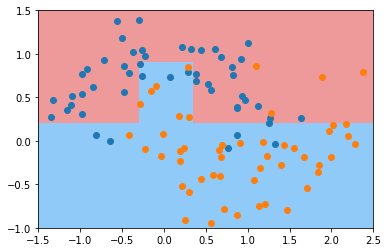

In [48]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)
dt_clf4.fit(X, y)

plot_decision_boundary(dt_clf4, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

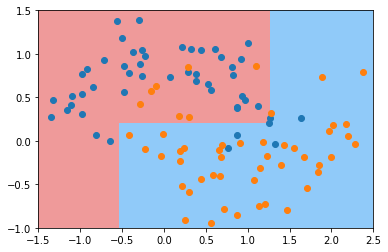

In [49]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4)
dt_clf5.fit(X, y)

plot_decision_boundary(dt_clf5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 12.6 决策树解决回归问题

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

#### Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [54]:
dt_reg.score(X_test, y_test)

0.5843688296782652

In [55]:
dt_reg.score(X_train, y_train)

1.0

## 12.7 决策树的局限性

* 只能横平竖直地拆分
* 对个别数据敏感

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [58]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*200)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*200)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

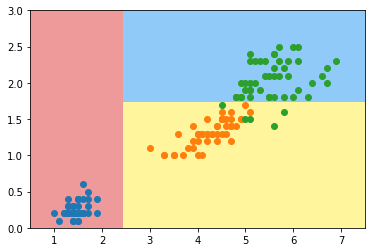

In [60]:
plot_decision_boundary(tree_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [61]:
X_new = np.delete(X, 138, axis=0)
y_new = np.delete(y, 138)

In [62]:
X_new.shape

(149, 2)

In [63]:
tree_clf2 = DecisionTreeClassifier(max_depth=2, criterion="entropy")
tree_clf2.fit(X_new, y_new)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

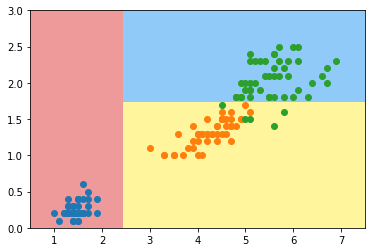

In [64]:
plot_decision_boundary(tree_clf2, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()